In [1]:
import pandas as pd
import numpy as np
#from scipy.misc import imread

In [2]:
import quandl
quandl.ApiConfig.api_key = '4nyydq5k_sPU89Nkvi_Q'
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

In [3]:
# Make calls to the quandl API to get the stock data for our five chosen stocks, for only the variables of interests, for only the first quarter, and put into stock df 
all_stock = quandl.get_table('WIKI/PRICES', ticker=["AAPL", "AMZN", "FB", "SBUX", "TWTR"], 
                             qopts={"columns":["date", "ticker","adj_open","adj_close","adj_volume"]},
                             date = {'gte': '2018-01-01', 'lte': '2018-03-31'}, paginate=True)

# Rename date column to make useful for future merges
all_stock = all_stock.rename(columns={'date':'Date'})
all_stock.head()

,Date,ticker,adj_open,adj_close,adj_volume
None,,,,,
0,2018-01-02,AAPL,170.16,172.26,25048048.0
1,2018-01-03,AAPL,172.53,172.23,28819653.0
2,2018-01-04,AAPL,172.54,173.03,22211345.0
3,2018-01-05,AAPL,173.44,175.00,23016177.0
4,2018-01-08,AAPL,174.35,174.35,20134092.0


In [4]:
# Make calls using the FinSents API wrapper (through quandl) for our 5 chosen companies on the NASDAQ and put into sentiments df
all_sent = quandl.get(['NS1/AAPL_US', 'NS1/AMZN_US', 'NS1/FB_US',  'NS1/SBUX_US', 'NS1/TWTR_US'], start_date='2018-01-01', end_date='2018-03-31')

# Reset index to make the date column usable for later merges
all_sent = all_sent.reset_index()
all_sent.head()

,Date,NS1/AAPL_US - Sentiment,NS1/AAPL_US - Sentiment High,NS1/AAPL_US - Sentiment Low,NS1/AAPL_US - News Volume,NS1/AAPL_US - News Buzz,NS1/AMZN_US - Sentiment,NS1/AMZN_US - Sentiment High,NS1/AMZN_US - Sentiment Low,NS1/AMZN_US - News Volume,...,NS1/SBUX_US - Sentiment,NS1/SBUX_US - Sentiment High,NS1/SBUX_US - Sentiment Low,NS1/SBUX_US - News Volume,NS1/SBUX_US - News Buzz,NS1/TWTR_US - Sentiment,NS1/TWTR_US - Sentiment High,NS1/TWTR_US - Sentiment Low,NS1/TWTR_US - News Volume,NS1/TWTR_US - News Buzz
0,2018-01-01,4.0,5.0,4.0,19.0,2.0,0.0,0.0,0.0,0.0,...,3.0,5.0,-2.0,6.0,5.0,4.0,5.0,3.0,156.0,10.0
1,2018-01-02,4.0,5.0,3.0,49.0,3.0,0.0,0.0,0.0,0.0,...,4.0,5.0,3.0,3.0,1.0,4.0,5.0,2.0,151.0,6.0
2,2018-01-03,4.0,5.0,4.0,41.0,3.0,0.0,0.0,0.0,0.0,...,5.0,5.0,4.0,4.0,1.0,4.0,5.0,2.0,156.0,6.0
3,2018-01-04,4.0,5.0,4.0,21.0,2.0,0.0,0.0,0.0,0.0,...,4.0,5.0,4.0,3.0,1.0,4.0,5.0,2.0,104.0,4.0
4,2018-01-05,4.0,5.0,4.0,64.0,9.0,0.0,0.0,0.0,0.0,...,4.0,5.0,4.0,14.0,10.0,4.0,5.0,2.0,149.0,6.0


In [5]:
# Drop unnecessary columns from sentiments df
cols = [2,3,7,8,12,13,17,18,22,23]
all_sent.drop(all_sent.columns[cols],axis=1,inplace=True)
all_sent.head()

,Date,NS1/AAPL_US - Sentiment,NS1/AAPL_US - News Volume,NS1/AAPL_US - News Buzz,NS1/AMZN_US - Sentiment,NS1/AMZN_US - News Volume,NS1/AMZN_US - News Buzz,NS1/FB_US - Sentiment,NS1/FB_US - News Volume,NS1/FB_US - News Buzz,NS1/SBUX_US - Sentiment,NS1/SBUX_US - News Volume,NS1/SBUX_US - News Buzz,NS1/TWTR_US - Sentiment,NS1/TWTR_US - News Volume,NS1/TWTR_US - News Buzz
0,2018-01-01,4.0,19.0,2.0,0.0,0.0,0.0,4.0,3.0,4.0,3.0,6.0,5.0,4.0,156.0,10.0
1,2018-01-02,4.0,49.0,3.0,0.0,0.0,0.0,4.0,24.0,7.0,4.0,3.0,1.0,4.0,151.0,6.0
2,2018-01-03,4.0,41.0,3.0,0.0,0.0,0.0,4.0,30.0,9.0,5.0,4.0,1.0,4.0,156.0,6.0
3,2018-01-04,4.0,21.0,2.0,0.0,0.0,0.0,4.0,10.0,3.0,4.0,3.0,1.0,4.0,104.0,4.0
4,2018-01-05,4.0,64.0,9.0,0.0,0.0,0.0,4.0,13.0,4.0,4.0,14.0,10.0,4.0,149.0,6.0


In [6]:
# Rename columns for readability 
all_sent_rename = all_sent.rename(index=str, columns={"NS1/AAPL_US - Sentiment": "AAPL Sentiment", 
                                    "NS1/AAPL_US - News Volume": "AAPL News Volume",
                                    "NS1/AAPL_US - News Buzz": "AAPL News Buzz",
                                    "NS1/AMZN_US - Sentiment": "AMZN Sentiment", 
                                    "NS1/AMZN_US - News Volume": "AMZN News Volume",
                                    "NS1/AMZN_US - News Buzz": "AMZN News Buzz",
                                    "NS1/FB_US - Sentiment": "FB Sentiment", 
                                    "NS1/FB_US - News Volume": "FB News Volume",
                                    "NS1/FB_US - News Buzz": "FB News Buzz",
                                    "NS1/SBUX_US - Sentiment": "SBUX Sentiment", 
                                    "NS1/SBUX_US - News Volume": "SBUX News Volume",
                                    "NS1/SBUX_US - News Buzz": "SBUX News Buzz",
                                    "NS1/TWTR_US - Sentiment": "TWTR Sentiment", 
                                    "NS1/TWTR_US - News Volume": "TWTR News Volume",
                                    "NS1/TWTR_US - News Buzz": "TWTR News Buzz"})
all_sent_rename.head(10)

,Date,AAPL Sentiment,AAPL News Volume,AAPL News Buzz,AMZN Sentiment,AMZN News Volume,AMZN News Buzz,FB Sentiment,FB News Volume,FB News Buzz,SBUX Sentiment,SBUX News Volume,SBUX News Buzz,TWTR Sentiment,TWTR News Volume,TWTR News Buzz
0,2018-01-01,4.0,19.0,2.0,0.0,0.0,0.0,4.0,3.0,4.0,3.0,6.0,5.0,4.0,156.0,10.0
1,2018-01-02,4.0,49.0,3.0,0.0,0.0,0.0,4.0,24.0,7.0,4.0,3.0,1.0,4.0,151.0,6.0
2,2018-01-03,4.0,41.0,3.0,0.0,0.0,0.0,4.0,30.0,9.0,5.0,4.0,1.0,4.0,156.0,6.0
3,2018-01-04,4.0,21.0,2.0,0.0,0.0,0.0,4.0,10.0,3.0,4.0,3.0,1.0,4.0,104.0,4.0
4,2018-01-05,4.0,64.0,9.0,0.0,0.0,0.0,4.0,13.0,4.0,4.0,14.0,10.0,4.0,149.0,6.0
5,2018-01-06,4.0,43.0,10.0,0.0,0.0,0.0,4.0,16.0,8.0,4.0,7.0,10.0,4.0,118.0,10.0
6,2018-01-07,5.0,9.0,10.0,0.0,0.0,0.0,4.0,9.0,10.0,4.0,3.0,10.0,4.0,55.0,10.0
7,2018-01-08,4.0,74.0,10.0,0.0,0.0,0.0,4.0,29.0,10.0,4.0,13.0,10.0,4.0,89.0,10.0
8,2018-01-09,4.0,52.0,8.0,0.0,0.0,0.0,4.0,43.0,10.0,4.0,10.0,8.0,4.0,69.0,5.0
9,2018-01-10,4.0,31.0,5.0,0.0,0.0,0.0,4.0,14.0,3.0,4.0,6.0,5.0,4.0,61.0,4.0


In [7]:
# Subset data into new df for variable: Sentiment
sent_only = all_sent_rename[["Date","AAPL Sentiment", "AMZN Sentiment", "FB Sentiment", "SBUX Sentiment", "TWTR Sentiment"]]
#sent_only.head()

In [8]:
# Convert timestamp to date time
pd.to_datetime(sent_only['Date']).apply(lambda x: x.date())

# Set date as index for graphing
sent_only = sent_only.set_index("Date")
#sent_only.head()

In [9]:
colors = ['#999999', '#FF9900', '#43609C', '#007343', '#6CADDE']


In [10]:
# Subset data into new df for variable: News volume
news_vol_only = all_sent_rename[["Date","AAPL News Volume", "AMZN News Volume", "FB News Volume", "SBUX News Volume", "TWTR News Volume"]]
#news_vol_only.head()

In [11]:
# Convert timestamp to date time
#pd.to_datetime(news_vol_only['Date']).apply(lambda x: x.date())

# Set date as index for graphing
news_vol_only = news_vol_only.set_index("Date")
#news_vol_only.head()

In [12]:
print(news_vol_only.head())

            AAPL News Volume  AMZN News Volume  FB News Volume  \
Date                                                             
2018-01-01              19.0               0.0             3.0   
2018-01-02              49.0               0.0            24.0   
2018-01-03              41.0               0.0            30.0   
2018-01-04              21.0               0.0            10.0   
2018-01-05              64.0               0.0            13.0   

            SBUX News Volume  TWTR News Volume  
Date                                            
2018-01-01               6.0             156.0  
2018-01-02               3.0             151.0  
2018-01-03               4.0             156.0  
2018-01-04               3.0             104.0  
2018-01-05              14.0             149.0  


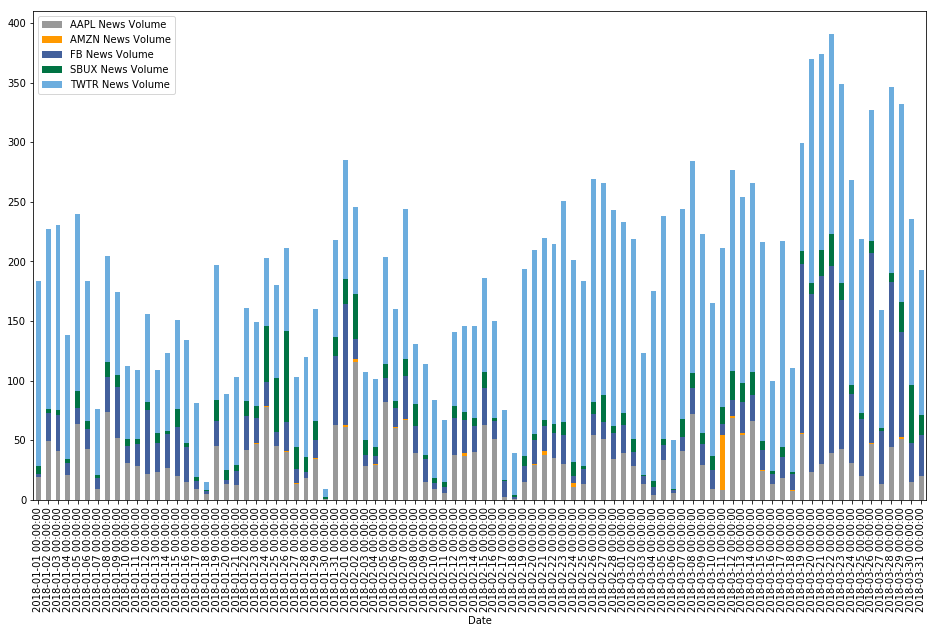

In [13]:
# Create plot for variable: News volume
# Need to label axes and title graph
plt.rcParams["figure.figsize"] = [16,9]
news_vol_only.plot.bar(stacked=True, color = colors)
plt.show()
# output as png

In [14]:
# Subset data into new df for variable: News buzz
buzz_only = all_sent_rename[["Date","AAPL News Buzz", "AMZN News Buzz", "FB News Buzz", "SBUX News Buzz", "TWTR News Buzz"]]
#buzz_only.head()

In [15]:
# Convert timestamp to date time
#pd.to_datetime(news_vol_only['Date']).apply(lambda x: x.date())

# Set date as index for graphing
buzz_only = buzz_only.set_index("Date")
#buzz_only.head()

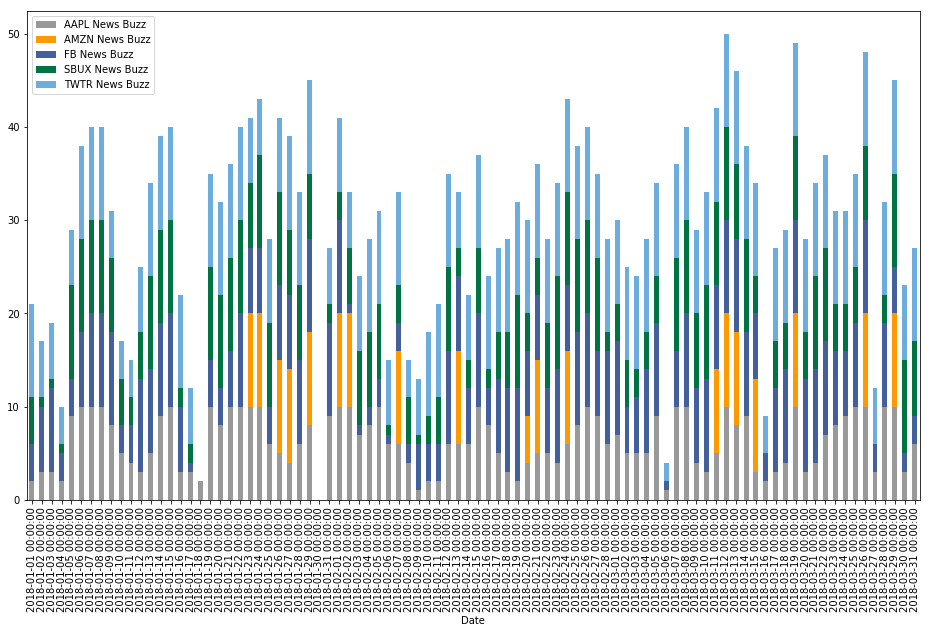

In [16]:
# Create plot for variable: News Buzz
# Need to label axes and title graph
plt.rcParams["figure.figsize"] = [16,9]
buzz_only.plot.bar(stacked=True, color = colors)
plt.show()
# output as png

In [17]:
# Merge the stock data with the sentiments data 
merge_df = all_stock.merge(all_sent_rename, on="Date", how="outer")
merge_df.head(100)

,Date,ticker,adj_open,adj_close,adj_volume,AAPL Sentiment,AAPL News Volume,AAPL News Buzz,AMZN Sentiment,AMZN News Volume,AMZN News Buzz,FB Sentiment,FB News Volume,FB News Buzz,SBUX Sentiment,SBUX News Volume,SBUX News Buzz,TWTR Sentiment,TWTR News Volume,TWTR News Buzz
0,2018-01-02,AAPL,170.160,172.26,25048048.0,4.0,49.0,3.0,0.0,0.0,0.0,4.0,24.0,7.0,4.0,3.0,1.0,4.0,151.0,6.0
1,2018-01-02,AMZN,1172.000,1189.01,2587899.0,4.0,49.0,3.0,0.0,0.0,0.0,4.0,24.0,7.0,4.0,3.0,1.0,4.0,151.0,6.0
2,2018-01-02,FB,177.680,181.42,17694891.0,4.0,49.0,3.0,0.0,0.0,0.0,4.0,24.0,7.0,4.0,3.0,1.0,4.0,151.0,6.0
3,2018-01-02,SBUX,57.950,57.63,7199959.0,4.0,49.0,3.0,0.0,0.0,0.0,4.0,24.0,7.0,4.0,3.0,1.0,4.0,151.0,6.0
4,2018-01-02,TWTR,24.070,24.51,15283036.0,4.0,49.0,3.0,0.0,0.0,0.0,4.0,24.0,7.0,4.0,3.0,1.0,4.0,151.0,6.0
5,2018-01-03,AAPL,172.530,172.23,28819653.0,4.0,41.0,3.0,0.0,0.0,0.0,4.0,30.0,9.0,5.0,4.0,1.0,4.0,156.0,6.0
6,2018-01-03,AMZN,1188.300,1204.20,3044664.0,4.0,41.0,3.0,0.0,0.0,0.0,4.0,30.0,9.0,5.0,4.0,1.0,4.0,156.0,6.0
7,2018-01-03,FB,181.880,184.67,16595495.0,4.0,41.0,3.0,0.0,0.0,0.0,4.0,30.0,9.0,5.0,4.0,1.0,4.0,156.0,6.0
8,2018-01-03,SBUX,57.930,58.71,7417389.0,4.0,41.0,3.0,0.0,0.0,0.0,4.0,30.0,9.0,5.0,4.0,1.0,4.0,156.0,6.0
9,2018-01-03,TWTR,24.560,24.45,12792471.0,4.0,41.0,3.0,0.0,0.0,0.0,4.0,30.0,9.0,5.0,4.0,1.0,4.0,156.0,6.0


In [18]:
stocks = ["AMZN", "FB", "SBUX", "TWTR", "AAPL"]

merge_df = pd.DataFrame(merge_df)

In [19]:
stocks = ["AMZN", "FB", "SBUX", "TWTR", "AAPL"]

merge_df = pd.DataFrame(merge_df)


print("Creating the following dataframes: ")

for s in range(len(stocks)): 
    #The point of this is to dynamically change the variable names so we can split 
    #the merged dataframe by ticker names 
    #and store them in their own dateframes! They will maintain the format of <tickername>_df
    globals()['%s_df' % stocks[s]] = merge_df[merge_df.iloc[:, 1] == stocks[s]]
    print('%s_df' % stocks[s])

Creating the following dataframes: 
AMZN_df
FB_df
SBUX_df
TWTR_df
AAPL_df


In [20]:
print(FB_df) #For example

          Date ticker  adj_open  adj_close   adj_volume  AAPL Sentiment  \
2   2018-01-02     FB    177.68   181.4200   17694891.0           4.000   
7   2018-01-03     FB    181.88   184.6700   16595495.0           4.000   
12  2018-01-04     FB    184.90   184.3300   13554357.0           4.000   
17  2018-01-05     FB    185.59   186.8500   13042388.0           4.000   
22  2018-01-08     FB    187.20   188.2800   14719216.0           4.000   
27  2018-01-09     FB    188.70   187.8700   12342722.0           4.000   
32  2018-01-10     FB    186.94   187.8400   10464528.0           4.000   
37  2018-01-11     FB    188.40   187.7700    8855144.0           4.000   
42  2018-01-12     FB    178.06   179.3700   76645626.0           4.000   
47  2018-01-16     FB    181.50   178.3900   35027166.0           2.000   
52  2018-01-17     FB    179.26   177.6000   27356988.0           2.000   
57  2018-01-18     FB    178.13   179.8000   22783759.0           2.000   
62  2018-01-19     FB    

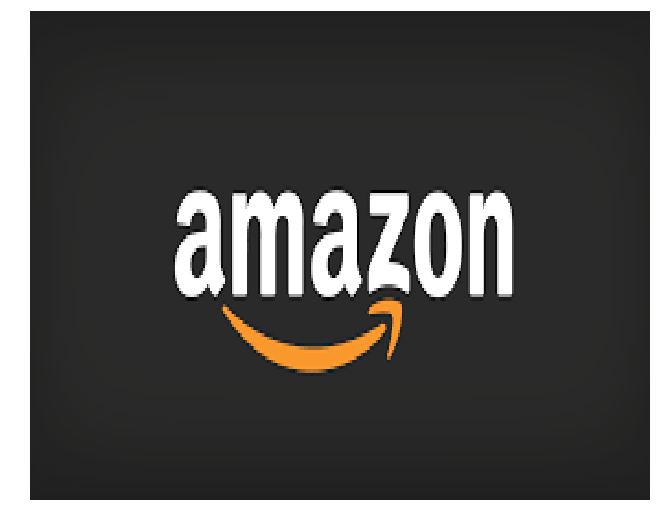

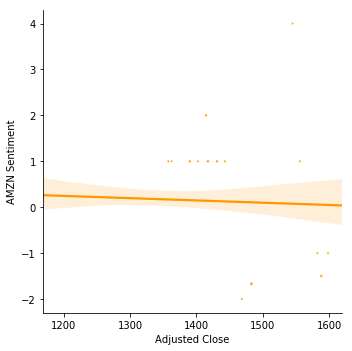

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#colors = ['#999999', '#FF9900', '#43609C', '#007343', '#6CADDE']



image = plt.imread('AMZLOGO.png')

fig, ax = plt.subplots()
ax.imshow(image, zorder=0, extent =[0.1, 2.0, .25, 1.75])
ax.axis('off') 
sns.lmplot(x='adj_close', y='AMZN Sentiment',
           fit_reg=True, line_kws={'color': '#FF9900'}, scatter_kws={'color': '#FF9900','s': AMZN_df['AMZN News Volume']},data=AMZN_df
           ).set_axis_labels("Adjusted Close", "AMZN Sentiment")
plt.show()

In [ ]:
#plt.show()

In [25]:
image = plt.imread('AAPLLOGO.png')

fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off') 


sns.lmplot(x='adj_close', y='AAPL Sentiment',
           fit_reg=True, line_kws={'color': '#999999'}, scatter_kws={'color': '#999999', 's': AAPL_df['AAPL News Volume']},data=AAPL_df
           ).set_axis_labels("Adjusted Close", "AAPL Sentiment")
# Color by evolution stage

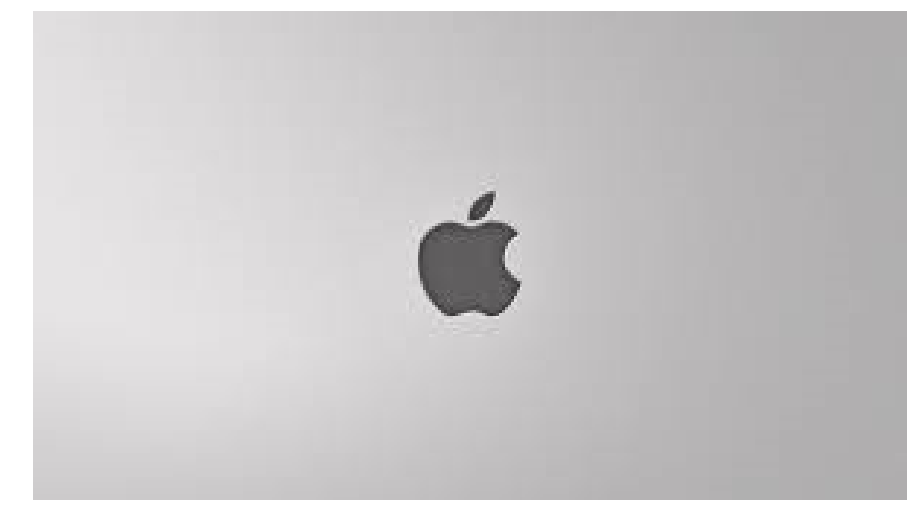

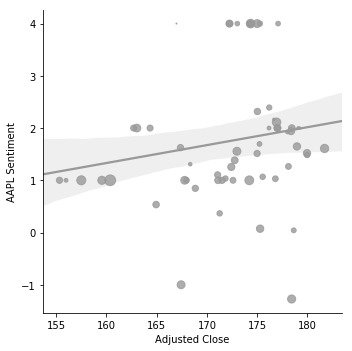

In [26]:
plt.show()

In [27]:
image = plt.imread('FBLOGO.png')

fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off') 

sns.lmplot(x='adj_close', y='FB Sentiment',
           fit_reg=True, line_kws={'color': '#43609C'}, scatter_kws={'color': '#43609C', 's': FB_df['FB News Volume']},data=FB_df
           ).set_axis_labels("Adjusted Close", "FB Sentiment")


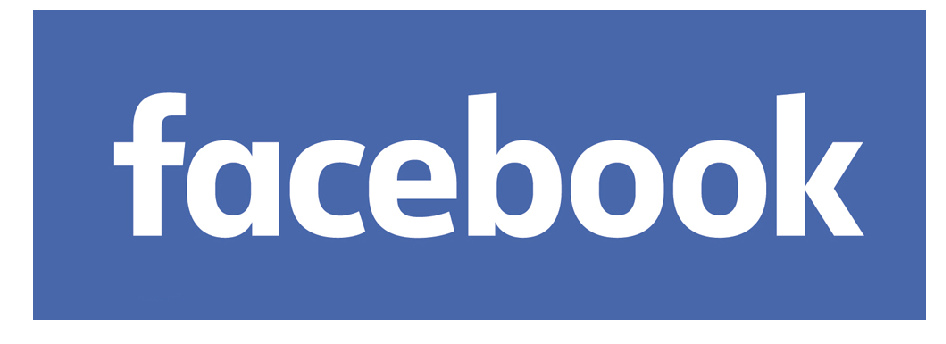

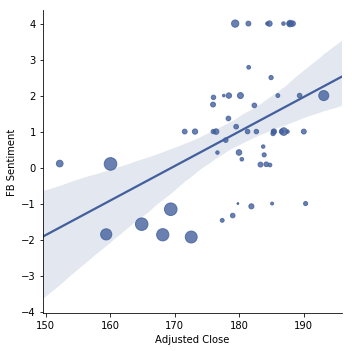

In [28]:
plt.show()

In [29]:
image = plt.imread('STBLOGO.jpg')
fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off') 
sns.lmplot(x='adj_close', y='SBUX Sentiment', 
           fit_reg=True, line_kws={'color': '#007343'}, scatter_kws={'color': '#007343', 's': SBUX_df['SBUX News Volume']},data=SBUX_df
           ).set_axis_labels("Adjusted Close", "SBUX Sentiment")



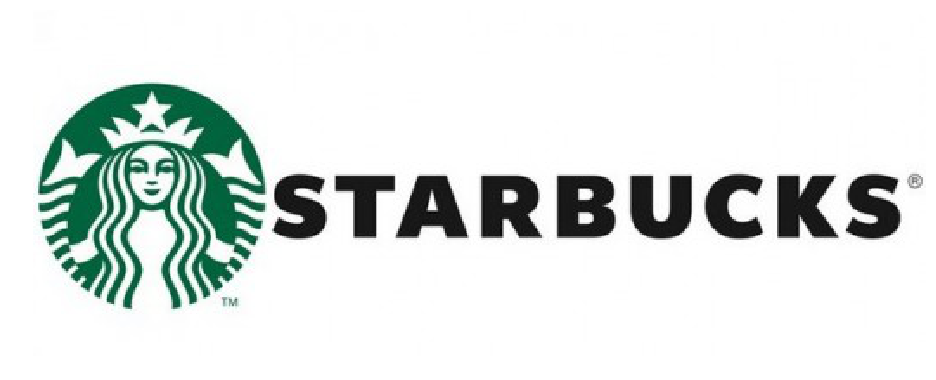

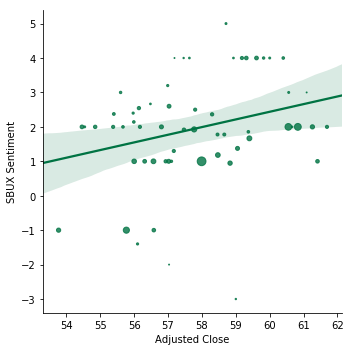

In [30]:
plt.show()

In [31]:
image = plt.imread("TWTRLOGO.JPG")
fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off') 

sns.lmplot(x='adj_close', y='SBUX Sentiment',
           fit_reg=True, line_kws={'color': '#6CADDE'}, scatter_kws={'color': '#6CADDE', 's': TWTR_df['SBUX News Volume']},data=TWTR_df
           ).set_axis_labels("Adjusted Close", "TWTR Sentiment")

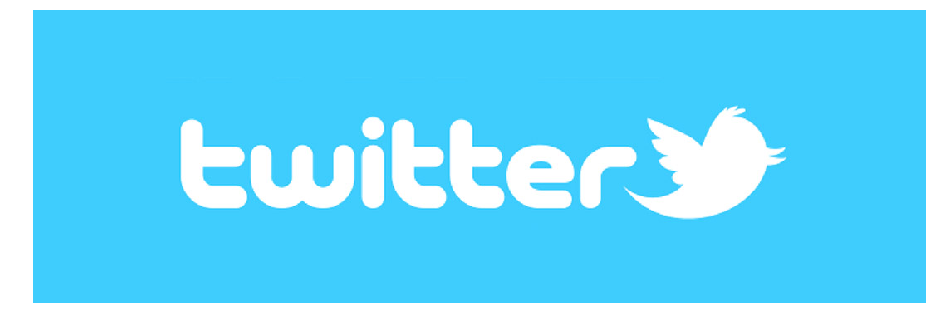

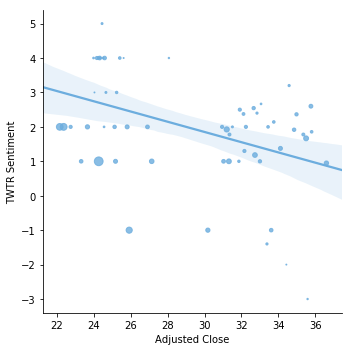

In [32]:
plt.show()

In [ ]:
sns.tsplot(data=df, time="date", unit="country",
           condition="Income Level", value="HIV Rate")
plt.show()